# `mnist.py`

In [4]:
# An MNIST loader.
import numpy as np
import gzip
import struct

def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables
        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a NumPy array of bytes:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the pixels into a matrix where each line is an image:
        return all_pixels.reshape(n_images, columns * rows)

def prepend_bias(X):
    # Insert a column of 1s in the position 0 of X.
    # (“axis=1” stands for: “insert a column, not a row”)
    return np.insert(X, 0, 1, axis=1)

def load_labels(filename):
  # Open and unzip the file of images:
  with gzip.open(filename, 'rb') as f:
    # Skip the header bytes:
    f.read(8)
    # Read all the labels into a list:
    all_labels = f.read()
    # Reshape the list of labels into a one-column matrix:
    return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)

def encode_fives(Y):
  # Convert all 5s to 1, and everything else to 0
  return (Y == 5).astype(int)

# `main.py`

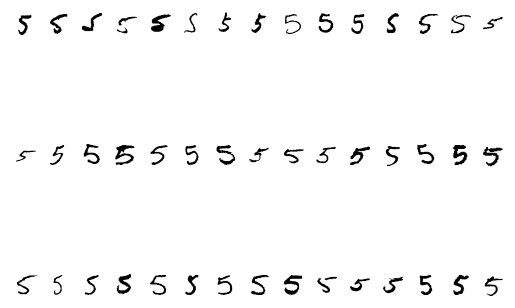

In [13]:
import numpy as np
import matplotlib.pyplot as plt

DIGIT = 5

X = load_images("input/train-images.idx3-ubyte.gz")
Y = load_labels("input/train-labels.idx1-ubyte.gz").flatten()
digits = X[Y == DIGIT]
np.random.shuffle(digits)

rows, columns = 3, 15
fig = plt.figure()
for i in range(rows * columns):
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.axis('off')
    ax.imshow(digits[i].reshape((28, 28)), cmap="Greys")
plt.show()